In [1]:
#imports
import tensorflow as tf
#import tensorflow_decision_forests as tfdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import xgboost as xg
from sklearn.model_selection import GridSearchCV
import catboost as cb

In [2]:
#initial

#read in
train_file_path = 'C:\\Users\\maxch\\Downloads\\laptops.csv'
df = pd.read_csv(train_file_path)
print("Full train dataset shape is {}".format(df.shape))



Full train dataset shape is (2160, 12)


In [3]:
# intialanalysis


print(df.head(3))
#print(dataset_df['SalePrice'].describe())
print(df.describe())
#get datatypes
list(set(df.dtypes.tolist()))

df.isnull().sum()
#class percent
#'print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')


                                              Laptop Status   Brand  \
0  ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...    New    Asus   
1  Alurin Go Start Intel Celeron N4020/8GB/256GB ...    New  Alurin   
2  ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...    New    Asus   

        Model            CPU  RAM  Storage Storage type  GPU  Screen Touch  \
0  ExpertBook  Intel Core i5    8      512          SSD  NaN    15.6    No   
1          Go  Intel Celeron    8      256          SSD  NaN    15.6    No   
2  ExpertBook  Intel Core i3    8      256          SSD  NaN    15.6    No   

   Final Price  
0       1009.0  
1        299.0  
2        789.0  
               RAM      Storage       Screen  Final Price
count  2160.000000  2160.000000  2156.000000  2160.000000
mean     15.413889   596.294444    15.168112  1312.638509
std       9.867815   361.220506     1.203329   911.475417
min       4.000000     0.000000    10.100000   201.050000
25%       8.000000   256.000000    14.000000

Laptop             0
Status             0
Brand              0
Model              0
CPU                0
RAM                0
Storage            0
Storage type      42
GPU             1371
Screen             4
Touch              0
Final Price        0
dtype: int64

In [4]:
for c in df.columns:
    print(c)
    print(df[c].isnull().sum().max())

Laptop
0
Status
0
Brand
0
Model
0
CPU
0
RAM
0
Storage
0
Storage type
42
GPU
1371
Screen
4
Touch
0
Final Price
0


In [5]:
 from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
integer_features=[]
categorical_features = df.drop(['Final Price','Laptop'],axis=1).columns

X= df.drop(['Final Price','Laptop'],axis=1)
X=df[['RAM','Storage','Brand','CPU','Storage type','GPU','Screen']]
categorical_features = df[['RAM','Storage','Brand','CPU','Storage type','GPU','Screen']].columns
y=df['Final Price']

#convert datatypes and filll in with calssifier, using cat boos model, fir
numerical_transformer = SimpleImputer(strategy='constant')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, integer_features),
        ('cat', categorical_transformer, categorical_features)
    ])


my_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',MLPRegressor( alpha=4e-5,max_iter=200, random_state=1))
])



X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

parameters = {'model__solver':['lbgfs','adam','sgd'], 
              'model__hidden_layer_sizes':[(800, 400),(440,220),(1270,630)],
                                           'model__activation':['relu','tanh','logistic']}
clf = GridSearchCV(my_pipeline, parameters)
clf.fit(X_train,y_train)
print(clf.best_params_)

print("Best parameter (CV score=%0.3f):" % clf.best_score_)
preds = clf.predict(X_test)
print('MAE:', mean_absolute_error(y_test, preds))
#my_pipeline.score(X_test,y_test)





C:\Users\maxch\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\maxch\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\maxch\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\maxch\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\maxch\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\maxch\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\maxch\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\maxch\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\maxch\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\maxch\anaconda3\lib\site-packages\sklearn\neural_network\_multi

{'model__activation': 'relu', 'model__hidden_layer_sizes': (800, 400), 'model__solver': 'adam'}
Best parameter (CV score=0.836):
MAE: 243.72048181113226


C:\Users\maxch\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [6]:
df['GPU']=df['GPU'].fillna('None')

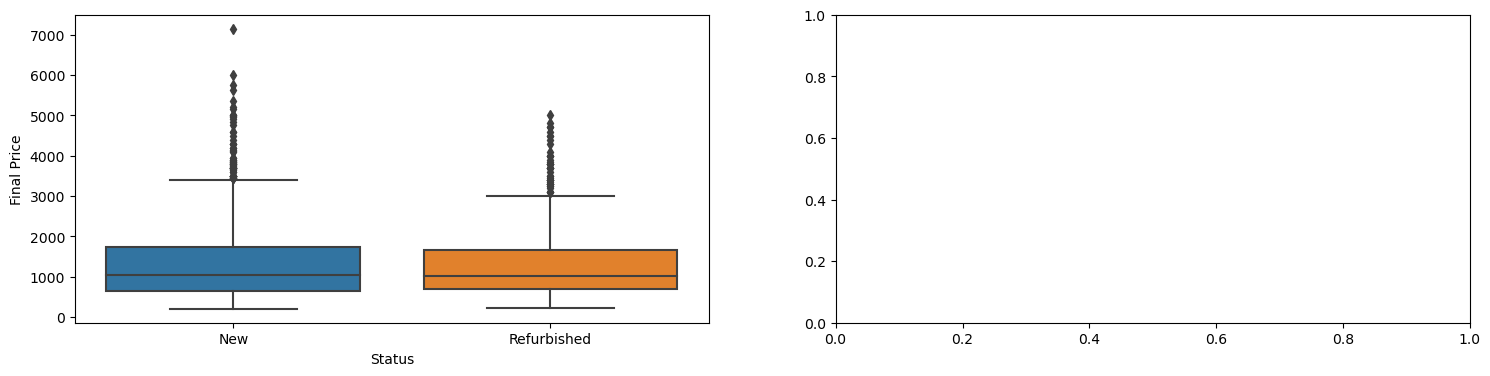

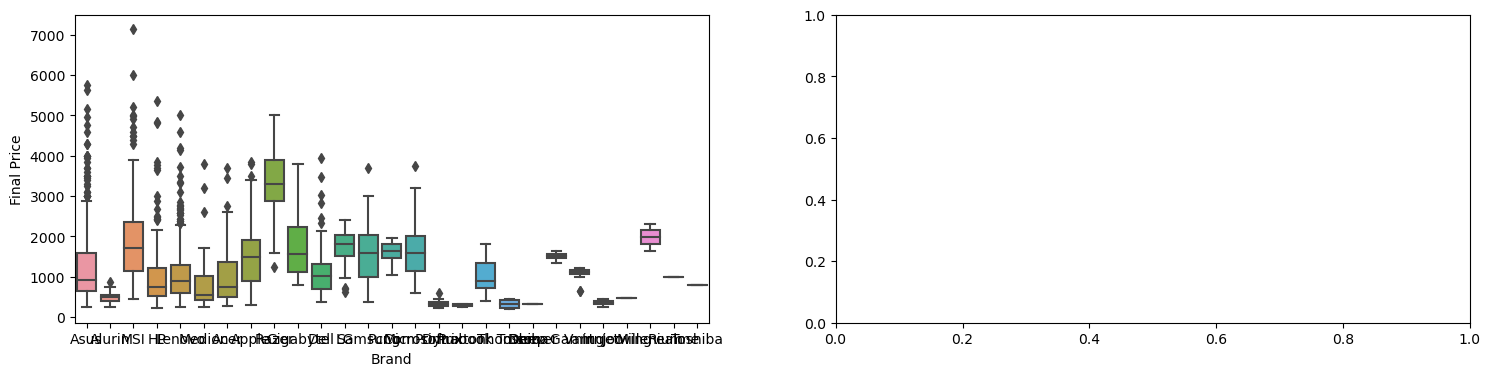

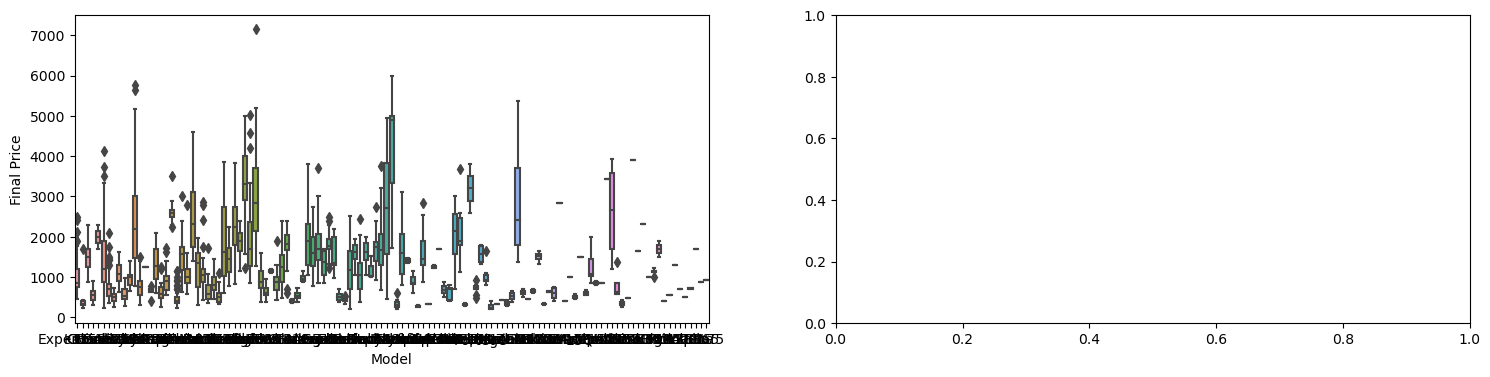

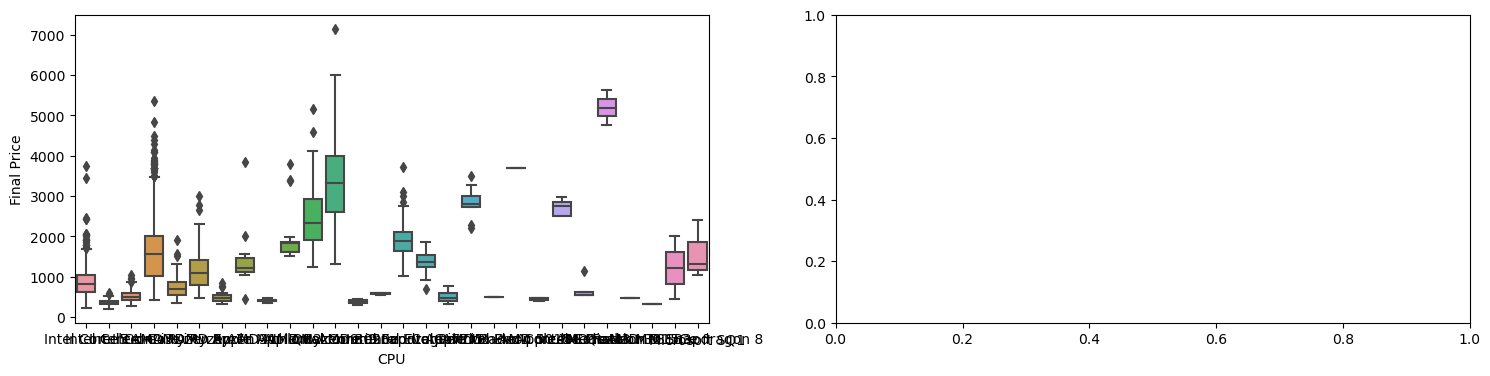

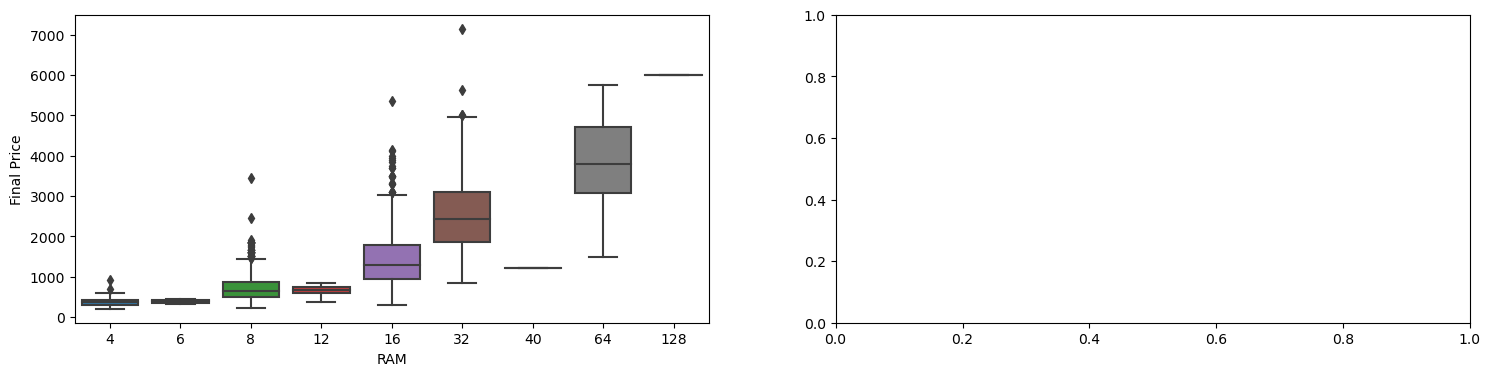

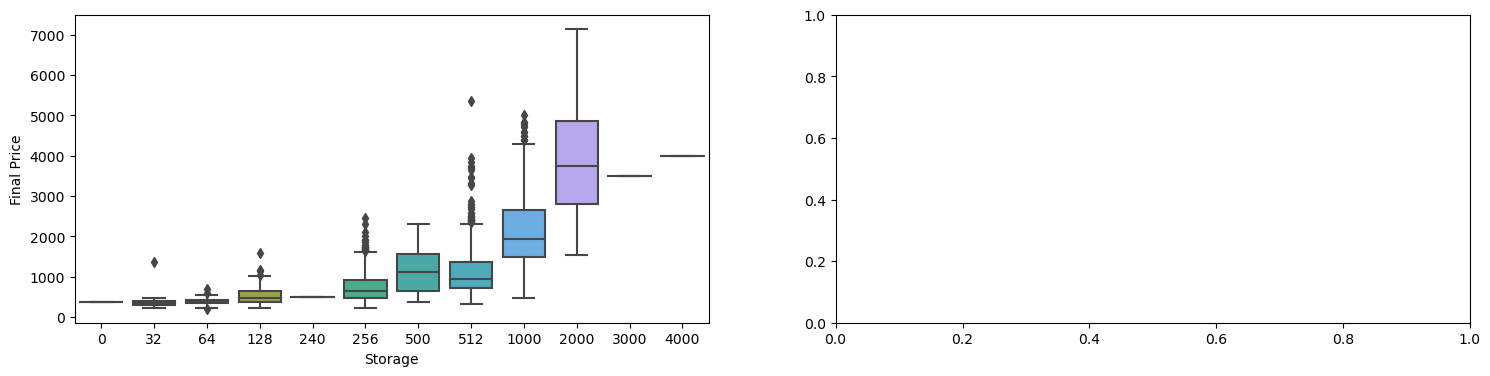

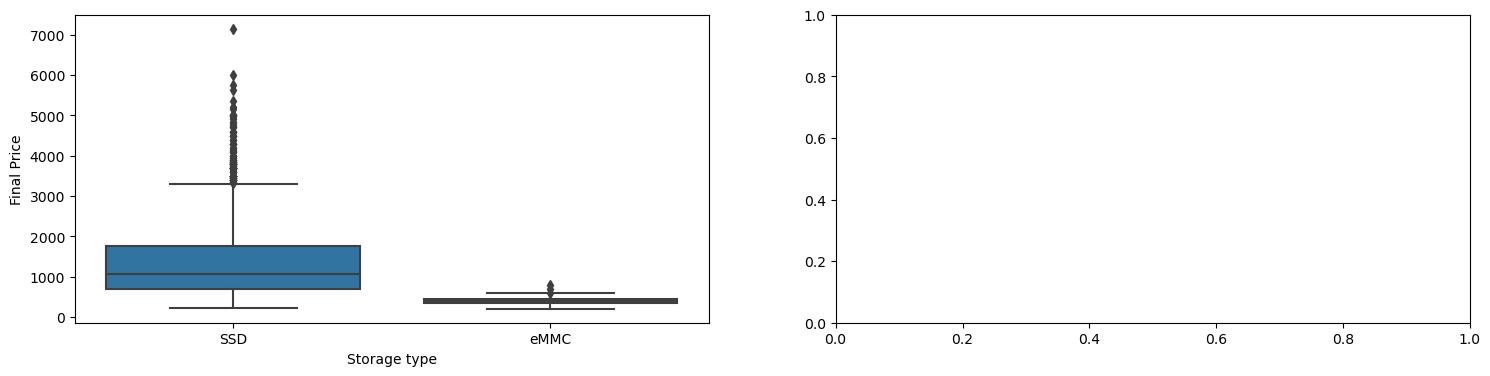

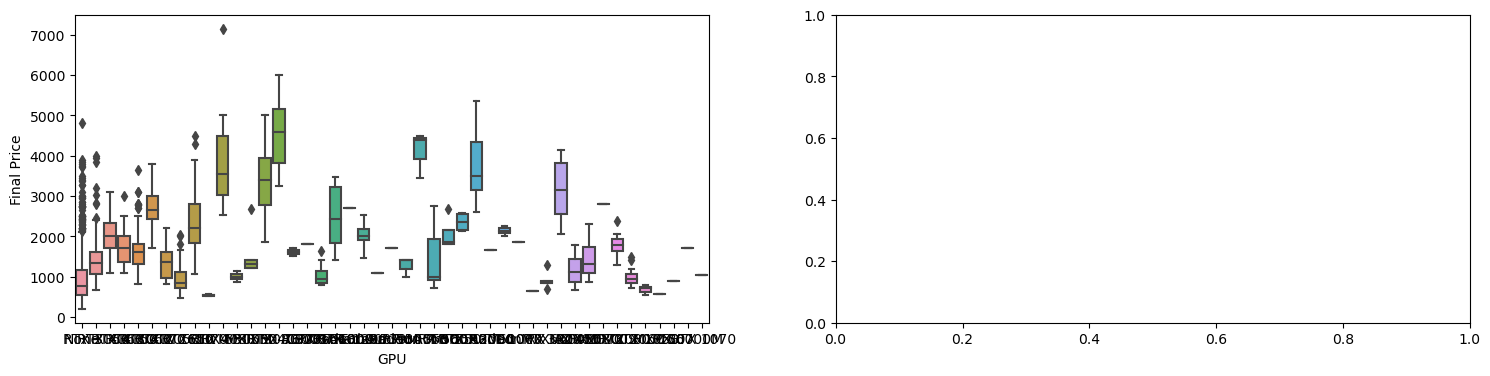

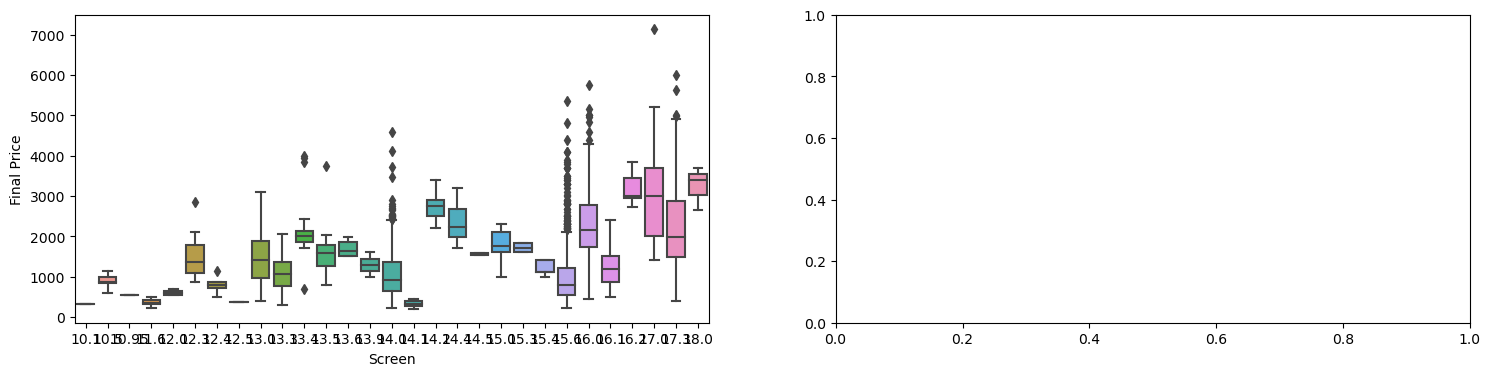

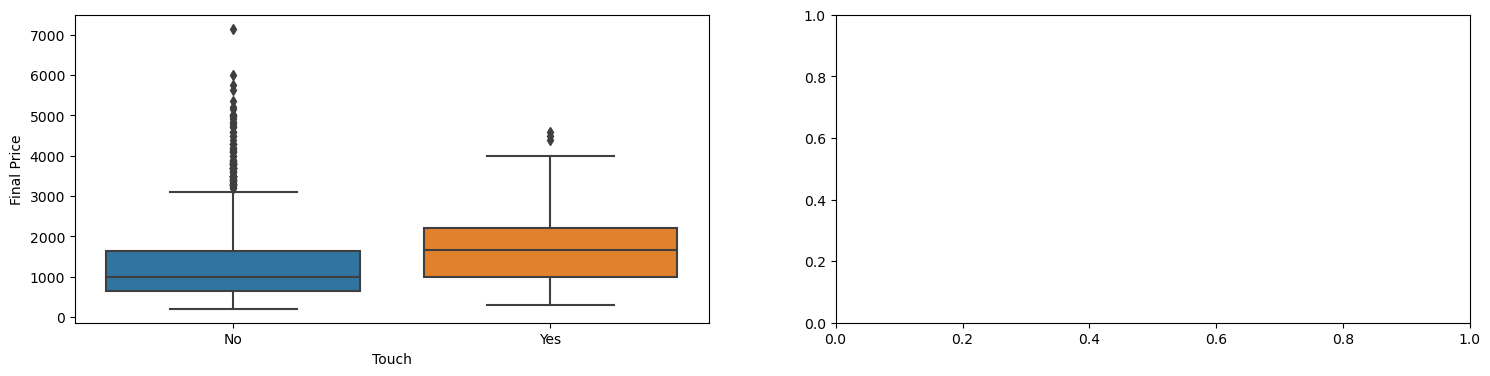

In [7]:
for column in df.drop(['Final Price','Laptop'],axis=1).columns:
    fig, ax = plt.subplots(1, 2, figsize=(18,4))
    sns.boxplot(x=df[column],y=df['Final Price'], ax=ax[0])

C:\Users\maxch\AppData\Local\Temp\ipykernel_936\56656733.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='r')


(201.05, 7150.47)

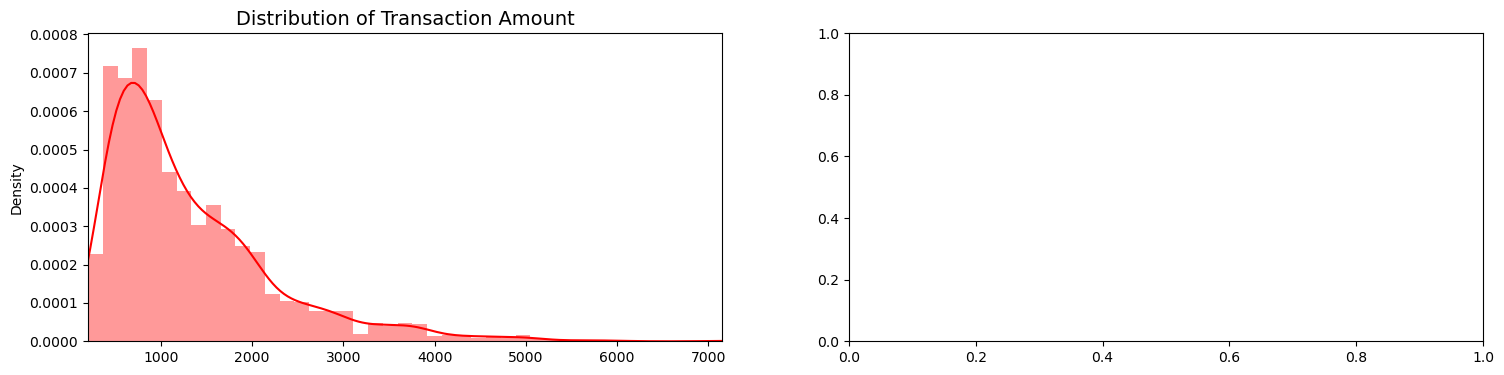

In [8]:
#plotting


#hist 
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Final Price'].values
sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])



C:\Users\maxch\AppData\Local\Temp\ipykernel_936\2185247325.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

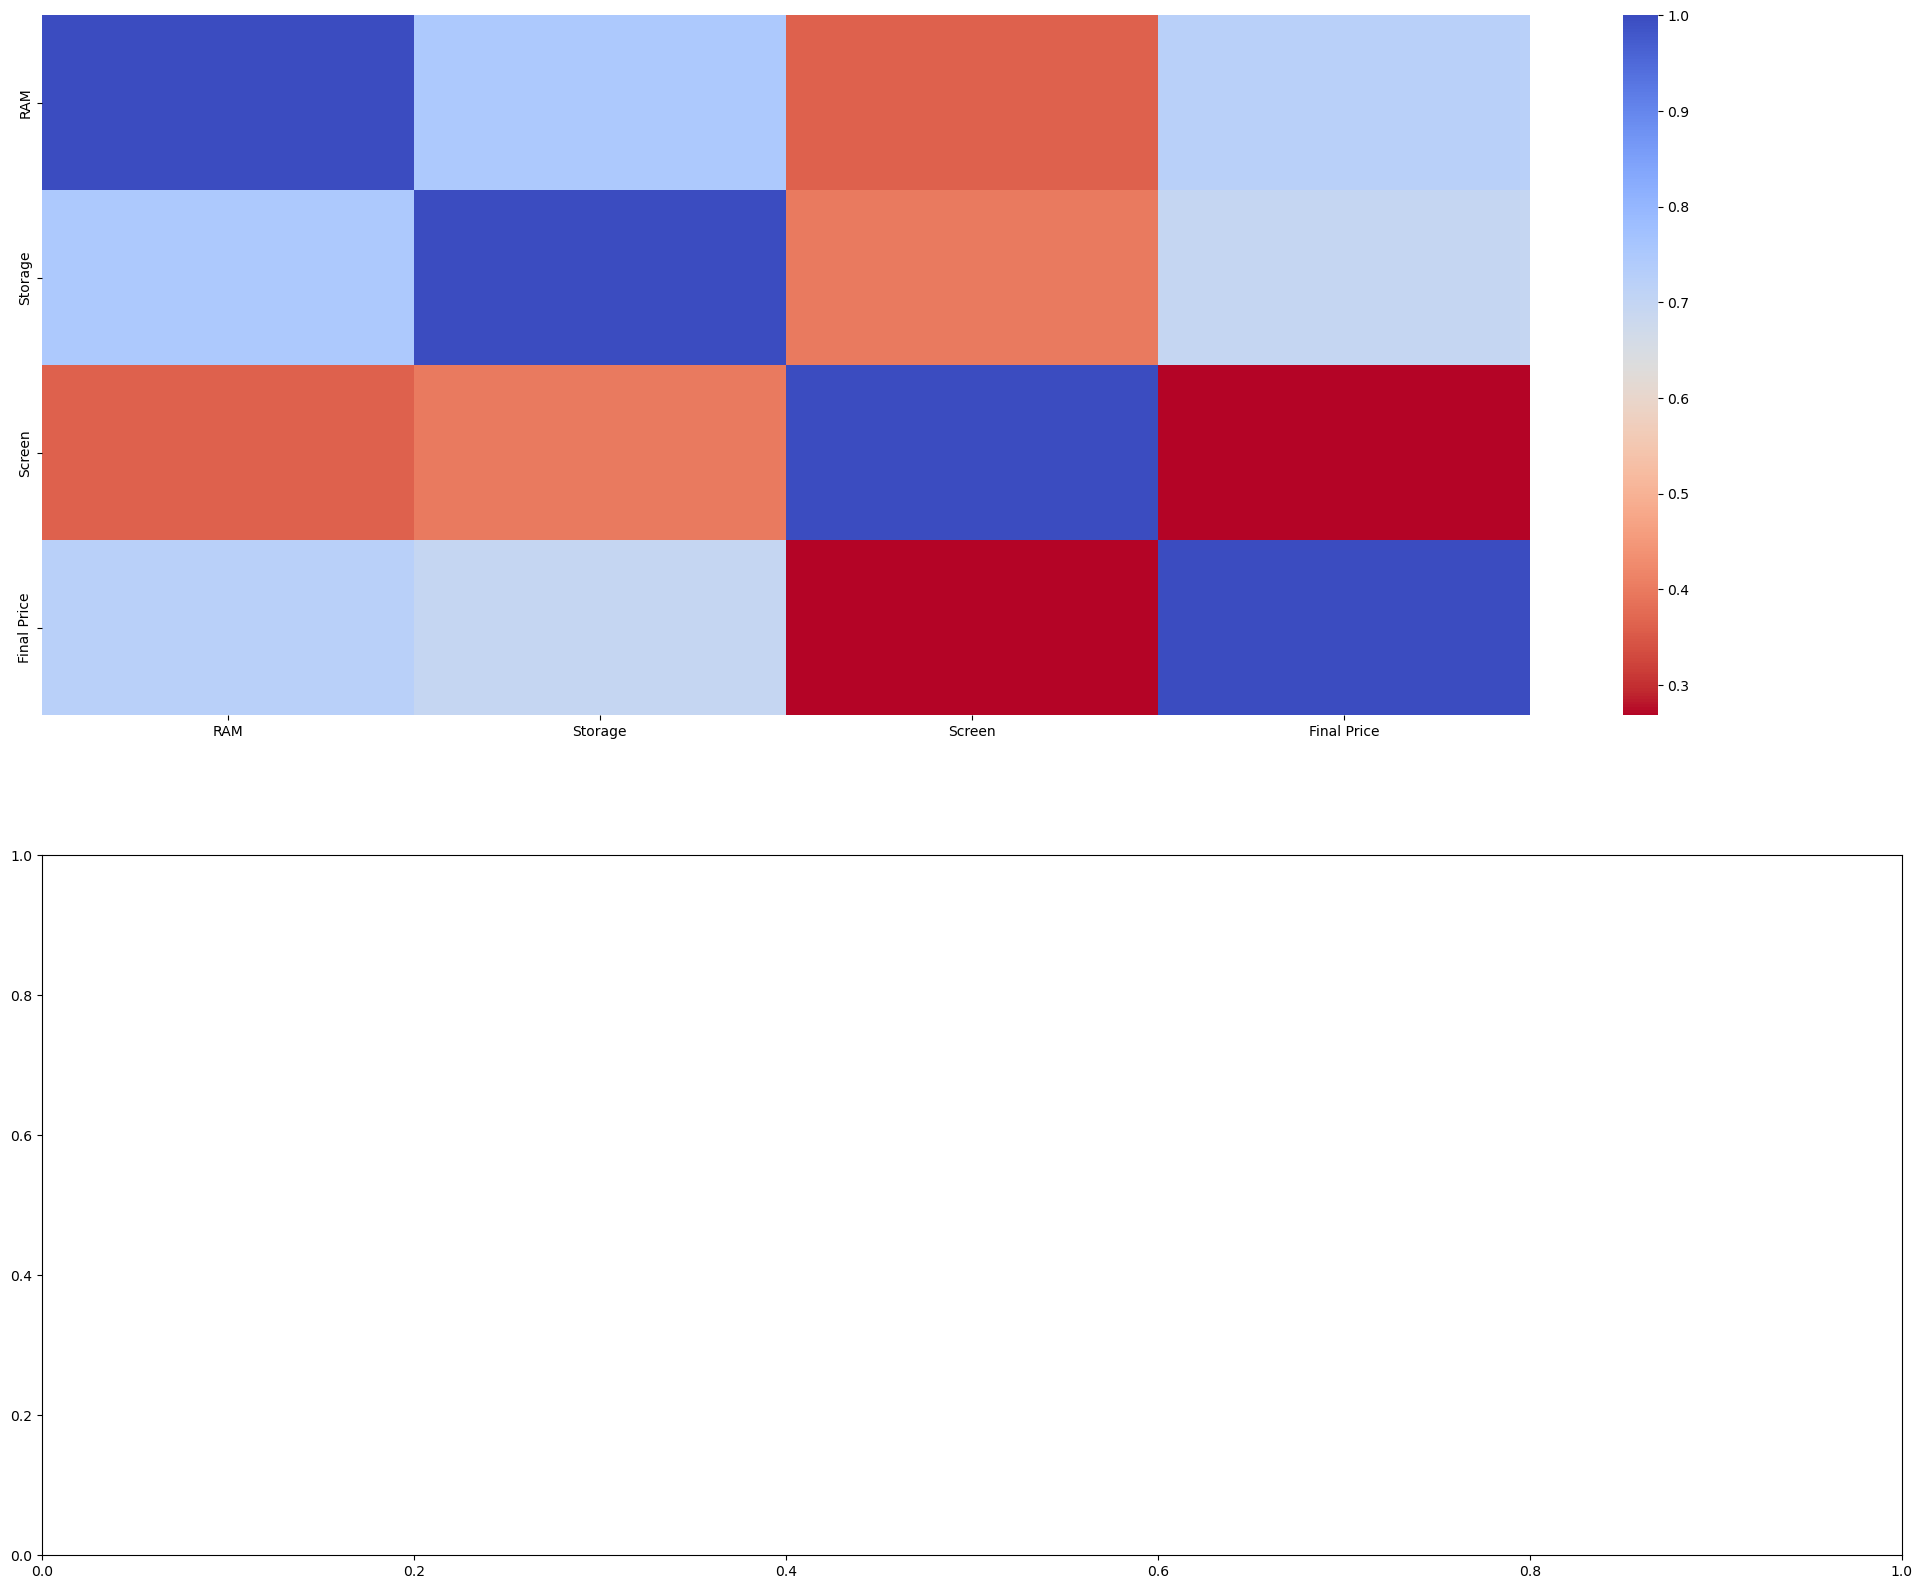

In [9]:
#heatmap

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)


In [10]:
#cleaning

#drop unneccesary columns
dataset_df = dataset_df.drop('Id', axis=1)

#scale
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

NameError: name 'dataset_df' is not defined

In [ ]:
#training

#pandas to keras
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label, task = tfdf.keras.Task.REGRESSION)


X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

#create test train array
for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#shuffle
new_df = normal_distributed_df.sample(frac=1, random_state=42)

In [ ]:
# modles
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)

In [ ]:
#Clasification models

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

In [ ]:
#grid search cv
# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

In [ ]:
#graphing success

import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)")
plt.show()

In [ ]:
#precision recall



from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

